拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [199]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
#df[:5]

In [201]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

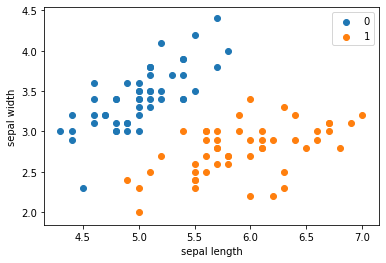

In [202]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [203]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [204]:
X, y = data[:,:-1], data[:,-1]
print(X[0])
print(y[0])

[5.1 3.5]
0.0


In [205]:
y = np.array([1 if i == 1 else -1 for i in y])

# 查看每一步的分类结果

The shape of train_small: (20, 3)


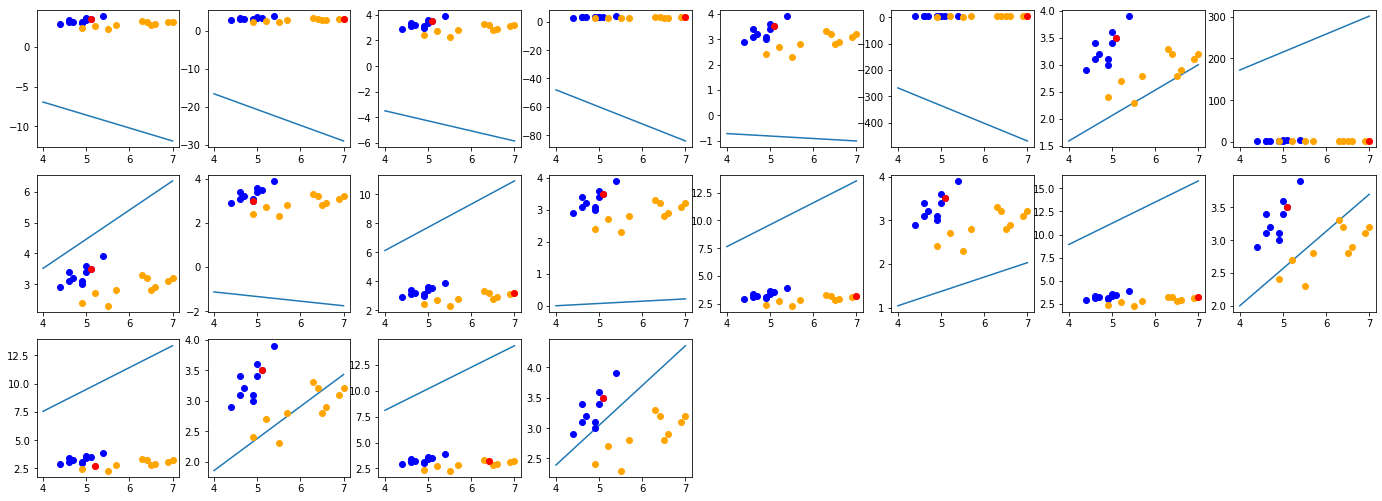

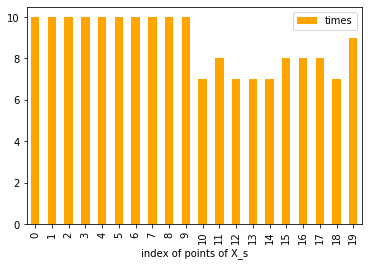

In [266]:
data = np.array(df.iloc[:100, [0, 1, -1]])
train_s = np.concatenate((data[0:10],data[50:60]),axis=0)
print("The shape of train_small:",train_s.shape)
X_s, y_s = train_s[:,:-1], train_s[:,-1]
y_s = np.array([1 if i == 1 else -1 for i in y_s])

# 单步调试感知机
class S_Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)  #初始化w
        self.b = 0  #初始化b
        self.l_rate = 1  #设置学习率  
        self.fig_idx = 0
        self.wrong_num=0
        self.wrong_points=np.array([[0,0]])
        self.l=[0 for i in range(len(X_s))]#记录点X[idx]被误分类次数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
   
    def fit(self, X_s, y_s, idx):      
        x=X_s[idx]
        y=y_s[idx]
        if y * self.sign(x, self.w, self.b) <= 0:
            self.w = self.w + self.l_rate * np.dot(y, x) #梯度下降进行参数学习
            self.b = self.b + self.l_rate * y #梯度下降进行参数学习
            self.wrong_num+=1
            self.wrong_points=x
            self.plot(self.fig_idx)
            self.fig_idx +=1
            self.count(X_s,y_s)
            
    def plot(self, idx):
        plt.subplot(16, 8, idx+1)
        x_points = np.linspace(4, 7, 10)
        y_ = -(self.w[0] * x_points + self.b) / self.w[1]
        plt.plot(x_points, y_)
        plt.plot(train_s[:10, 0], train_s[:10, 1], 'bo', color='blue', label='0')
        plt.plot(train_s[10:20, 0], train_s[10:20, 1], 'bo', color='orange', label='1')
        plt.plot(self.wrong_points[0],self.wrong_points[1], 'bo', color='red', label='2')
        
    def count(self,X_s,y_s):
        
        for idx in range(20):
                X = X_s[idx]
                y = y_s[idx]
                if y*self.sign(X, self.w, self.b) <= 0:#点被感知线误分类
                    self.l[idx]+=1 #记录点X[idx]被误分类次数
        
                    
perception = S_Model()
plt.figure(figsize=(24, 48))
for i in range(40):    
    for idx in range(len(X_s)):
        perception.fit(X_s, y_s, idx)
# print("每个点被误分类点次数：\n",perception.l)

d=pd.DataFrame(perception.l,columns=['times'])
d.index.name = 'index of points of X_s'
d.plot.bar(color='orange')

# 作业：
### 1、使用手写的Perceptron模型（多步调试）对sklearn的乳腺癌数据集进行分类，数据集随机8:2进行划分，选择合适的迭代次数。完成函数score()的编写，计算训练完成后测试集的Accuracy。

### 2、改写Perceptron模型（单步模型），使用原数据，用红色标示出每次模型训练的点（即引起模型出错的点），统计每个点误分类的次数。